C:\Users\Musta\AppData\Local\Temp\ipykernel_11876\505423439.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path + filename)


Missing Values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           657370
ZIP CODE                          657630
LATITUDE                          241717
LONGITUDE                         241717
LOCATION                          241717
ON STREET NAME                    451472
CROSS STREET NAME                 803778
OFF STREET NAME                  1754156
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7046
CONTRIBUTING FACTOR VEHICLE 2     330255
CONTRIBUTING FACTOR VEHICLE 3    1961559
CONTRIBUTING FACTOR VEHICLE 4    2078880
CONTRIBUTING FACTOR VEHICLE 5    2103917
COLLISION_ID                           0

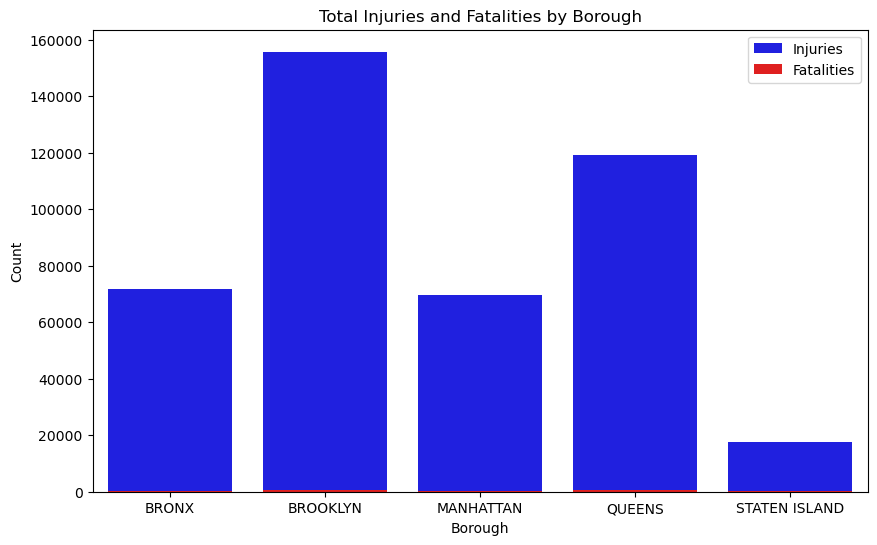

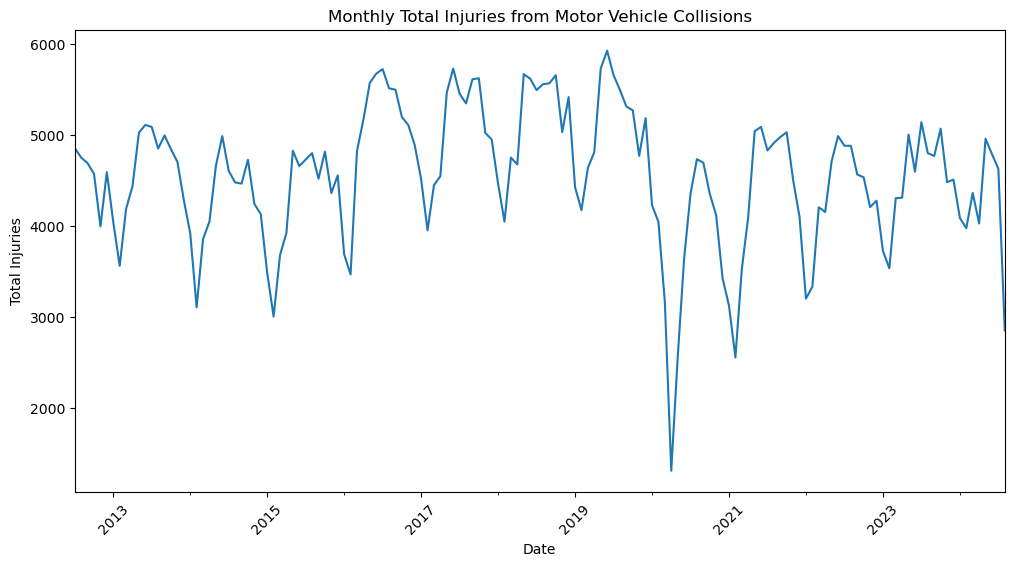

Hour with highest average injuries: 0:00
Hour with lowest average injuries: 0:00


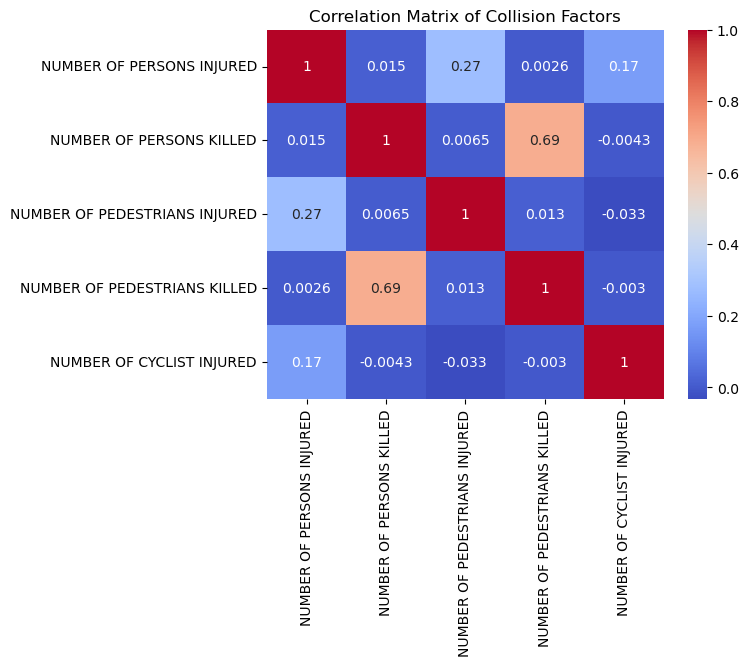

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data_path = 'C:\\Users\\Musta\\OneDrive\\Desktop\\.kaggle\\'  # Update with your actual path
filename = 'Motor_Vehicle_Collisions.csv'  # Ensure this matches the actual filename

# Check if the file exists before loading
try:
    df = pd.read_csv(data_path + filename)
except FileNotFoundError:
    print(f"File not found: {data_path + filename}")
    exit()

# 1. Data Cleaning
# Handling Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing numeric values with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Converting CRASH DATE to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')

# Trimming Whitespaces (for street names)
df['ON STREET NAME'] = df['ON STREET NAME'].str.strip()
df['CROSS STREET NAME'] = df['CROSS STREET NAME'].str.strip()

# 2. Data Analysis
# Descriptive Statistics
summary = df.describe()
print("Descriptive Statistics:\n", summary)

# Analyzing Injuries and Fatalities
total_injuries = df['NUMBER OF PERSONS INJURED'].sum()
total_fatalities = df['NUMBER OF PERSONS KILLED'].sum()
print(f"Total Injuries: {total_injuries}, Total Fatalities: {total_fatalities}")

# Grouping by Borough
borough_stats = df.groupby('BOROUGH').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum'
}).reset_index()
print("Borough Statistics:\n", borough_stats)

# 3. Data Visualization
# Bar Plot for Total Injuries and Fatalities by Borough
plt.figure(figsize=(10, 6))
sns.barplot(data=borough_stats, x='BOROUGH', y='NUMBER OF PERSONS INJURED', color='blue', label='Injuries')
sns.barplot(data=borough_stats, x='BOROUGH', y='NUMBER OF PERSONS KILLED', color='red', label='Fatalities')
plt.title('Total Injuries and Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend()
plt.show()

# Time Series Analysis: Injuries Over Time
injuries_over_time = df.groupby(df['CRASH DATE'].dt.to_period('M'))['NUMBER OF PERSONS INJURED'].sum()
injuries_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Total Injuries from Motor Vehicle Collisions')
plt.xlabel('Date')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

# 4. Additional Analysis
# Hour with Highest and Lowest Average Injuries
df['CRASH HOUR'] = df['CRASH DATE'].dt.hour
hourly_injuries = df.groupby('CRASH HOUR')['NUMBER OF PERSONS INJURED'].mean()
max_injuries_hour = hourly_injuries.idxmax()
min_injuries_hour = hourly_injuries.idxmin()
print(f"Hour with highest average injuries: {max_injuries_hour}:00")
print(f"Hour with lowest average injuries: {min_injuries_hour}:00")

# Heatmap of Correlation between different factors
correlation_matrix = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                         'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                         'NUMBER OF CYCLIST INJURED']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Collision Factors')
plt.show()

In [ ]:
2


Missing Values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           657370
ZIP CODE                          657630
LATITUDE                          241717
LONGITUDE                         241717
LOCATION                          241717
ON STREET NAME                    451472
CROSS STREET NAME                 803778
OFF STREET NAME                  1754156
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7046
CONTRIBUTING FACTOR VEHICLE 2     330255
CONTRIBUTING FACTOR VEHICLE 3    1961559
CONTRIBUTING FACTOR VEHICLE 4    2078880
CONTRIBUTING FACTOR VEHICLE 5    2103917
COLLISION_ID                           0

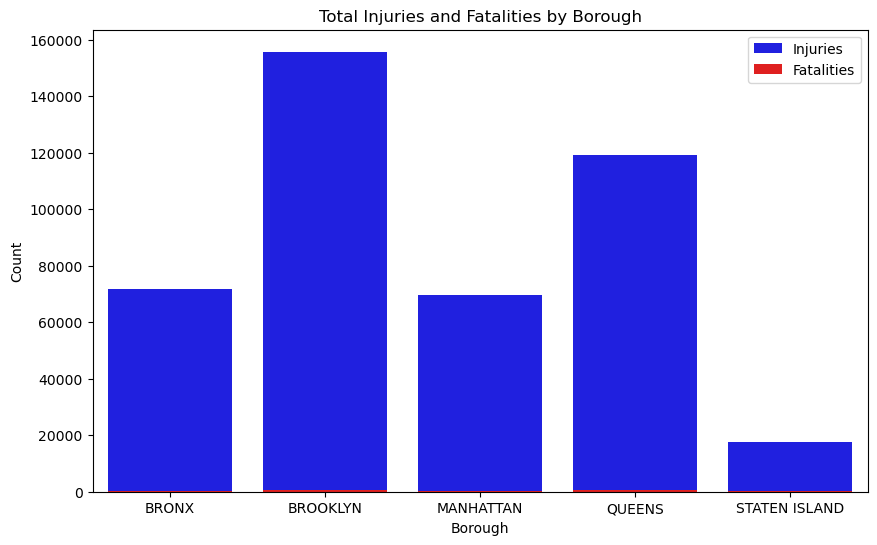

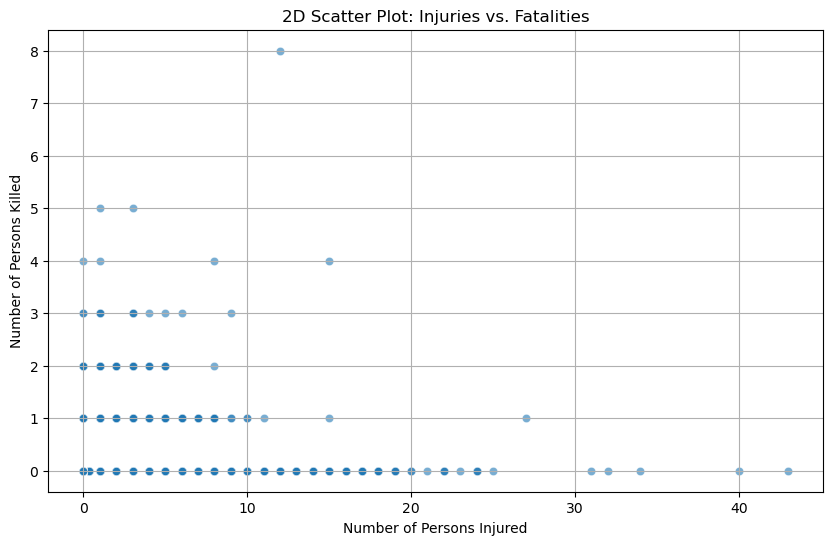

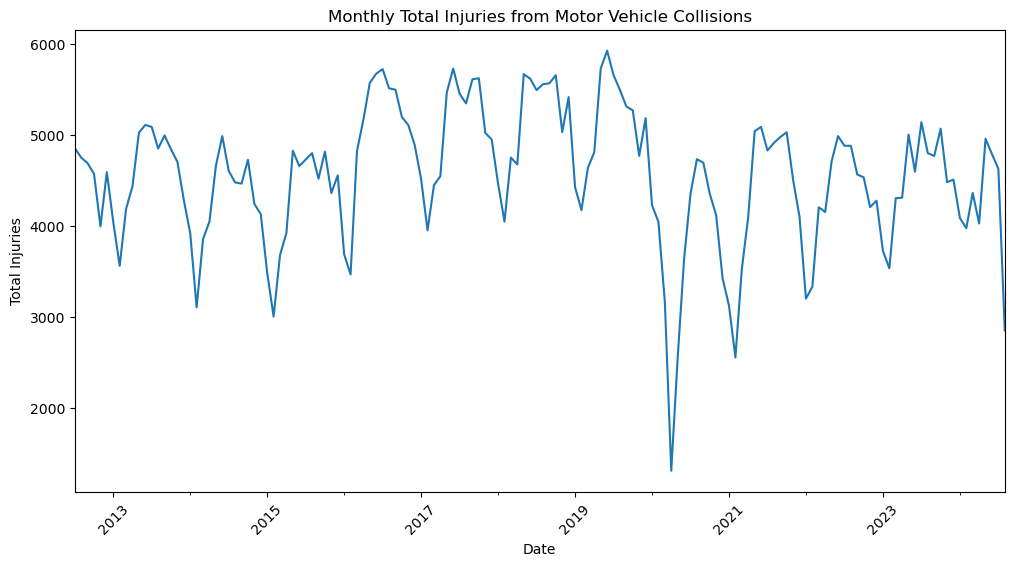

Hour with highest average injuries: 0:00
Hour with lowest average injuries: 0:00


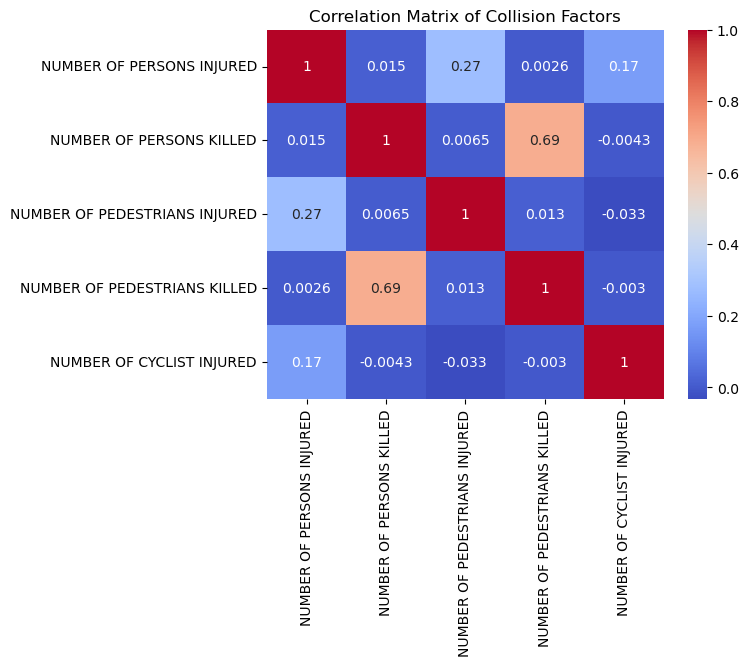

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Define the path to the ZIP file and the directory to extract it
zip_file_path = 'C:\\Users\\Musta\\OneDrive\\Desktop\\.kaggle\\Motor_Vehicle_Collisions.zip'
extract_dir = 'C:\\Users\\Musta\\OneDrive\\Desktop\\.kaggle\\Motor_Vehicle_Collisions'  # Directory to extract the CSV

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Assuming the CSV file is named 'Motor_Vehicle_Collisions.csv' after extraction
csv_file_path = os.path.join(extract_dir, 'Motor_Vehicle_Collisions.csv')

# Load the dataset
dtype_dict = {
    'BOROUGH': 'str',
    'ZIP CODE': 'str',
    'ON STREET NAME': 'str',
    'CROSS STREET NAME': 'str',
    'OFF STREET NAME': 'str',
    # Add other columns as necessary
}

# Read the CSV file
try:
    df = pd.read_csv(csv_file_path, dtype=dtype_dict, low_memory=False)
except FileNotFoundError:
    print(f"File not found: {csv_file_path}")
    exit()

# 1. Data Cleaning
# Handling Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill missing numeric values with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Converting CRASH DATE to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')

# Trimming Whitespaces (for street names)
df['ON STREET NAME'] = df['ON STREET NAME'].str.strip()
df['CROSS STREET NAME'] = df['CROSS STREET NAME'].str.strip()

# 2. Data Analysis
# Descriptive Statistics
summary = df.describe()
print("Descriptive Statistics:\n", summary)

# Analyzing Injuries and Fatalities
total_injuries = df['NUMBER OF PERSONS INJURED'].sum()
total_fatalities = df['NUMBER OF PERSONS KILLED'].sum()
print(f"Total Injuries: {total_injuries}, Total Fatalities: {total_fatalities}")

# Grouping by Borough
borough_stats = df.groupby('BOROUGH').agg({
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum'
}).reset_index()
print("Borough Statistics:\n", borough_stats)

# 3. Data Visualization
# Bar Plot for Total Injuries and Fatalities by Borough
plt.figure(figsize=(10, 6))
sns.barplot(data=borough_stats, x='BOROUGH', y='NUMBER OF PERSONS INJURED', color='blue', label='Injuries')
sns.barplot(data=borough_stats, x='BOROUGH', y='NUMBER OF PERSONS KILLED', color='red', label='Fatalities')
plt.title('Total Injuries and Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend()
plt.show()

# 2D Scatter Plot: Number of Persons Injured vs. Number of Persons Killed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NUMBER OF PERSONS INJURED', y='NUMBER OF PERSONS KILLED', alpha=0.6)
plt.title('2D Scatter Plot: Injuries vs. Fatalities')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Number of Persons Killed')
plt.grid(True)
plt.show()

# Time Series Analysis: Injuries Over Time
injuries_over_time = df.groupby(df['CRASH DATE'].dt.to_period('M'))['NUMBER OF PERSONS INJURED'].sum()
injuries_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Total Injuries from Motor Vehicle Collisions')
plt.xlabel('Date')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()

# 4. Additional Analysis
# Hour with Highest and Lowest Average Injuries
df['CRASH HOUR'] = df['CRASH DATE'].dt.hour
hourly_injuries = df.groupby('CRASH HOUR')['NUMBER OF PERSONS INJURED'].mean()
max_injuries_hour = hourly_injuries.idxmax()
min_injuries_hour = hourly_injuries.idxmin()
print(f"Hour with highest average injuries: {max_injuries_hour}:00")
print(f"Hour with lowest average injuries: {min_injuries_hour}:00")

# Heatmap of Correlation between different factors
correlation_matrix = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                         'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 
                         'NUMBER OF CYCLIST INJURED']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Collision Factors')
plt.show()